In [1]:
from IPython.utils import io
import pandas as pd
import os
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import seaborn as sns
import time
import joblib
from os.path import exists
import shutil
import sys
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
    
#From my EEG package 
import run_expts
import constants

In [2]:
# #file names 
# data_type + '_groups.h5'
# data_type + '_y.h5'
# data_type + '_full_c_22_features.h5'

In [3]:
load_path = '/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/C_22_data/Full_dfs/'
data_types = ['Wake','N1', 'N2', 'N3', 'REM']

loaded_data = {}

for data_type in data_types:
    X_y_groups = {}
    
    X = pd.read_hdf(load_path + data_type +  '_full_c_22_features.h5', key='df', mode='r')
    y = pd.read_hdf(load_path + data_type +  '_y.h5', key='df', mode='r') 
    groups = pd.read_hdf(load_path + data_type +  '_groups.h5', key='df', mode='r')
    X, y , groups = X.reset_index(drop = True) , y.reset_index(drop = True) , groups.reset_index(drop = True)

    X_y_groups['X'] = X
    X_y_groups['y'] = y
    X_y_groups['groups'] = groups

    loaded_data[data_type] = X_y_groups

In [4]:
# This code generates a region to features dictionary - this will enable us to run expts regionally as before
regional_features_dict = {}
region_channel_dict = constants.region_to_channel_dict

for region, region_channels in region_channel_dict.items():
    region_features = []
    for channel in region_channels:
        region_features += [feature for feature in X.columns if  feature.startswith(channel) ]
    regional_features_dict[region] = region_features

### Expt 1

In [17]:
#Run Expt 1 experiments 

t1 = time.time()

expt_1_results = {}

for data_type in data_types:
    X_y_groups = loaded_data[data_type]
    
    X = X_y_groups['X']
    y = X_y_groups['y'] 
    groups = X_y_groups['groups'] 
    
    #1.Generate expt specific X,y,groups
    X_expt , y_expt , groups_expt, expt_info = run_expts.generate_expt_x_y_groups(X,y,groups, 1 )

    results_df = run_expts.run_mv_tsc(X_expt,y_expt,groups_expt, {'RF' : RandomForestClassifier()} , return_df = True , subset_names_and_cols = regional_features_dict, random_states = [1,2] )
    
    expt_1_results[data_type] = results_df

t2 = time.time()

t2-t1

56.43723130226135

In [6]:
#Show the results
for data_type in data_types:
    print(data_type)
    results_df = expt_1_results[data_type]
    res_df = run_expts.generate_subset_acc_std(results_df, return_df = True)
    #print the results 
    # print(res_df[[col for col in res_df.columns if 'acc' in col]].mean(axis = 0))
    display(pd.DataFrame(res_df[[col for col in res_df.columns if 'acc' in col]].mean(axis = 0)).T)

Wake


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.616667,0.483333,0.633333,0.533333,0.433333,0.45,0.45,0.45,0.483333,0.516667,0.566667,0.366667,0.483333


N1


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.575,0.6375,0.55,0.6,0.55,0.6375,0.65,0.6875,0.5875,0.6875,0.55,0.5625,0.6


N2


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.545833,0.473611,0.541667,0.497222,0.427778,0.494444,0.544444,0.729167,0.519444,0.472222,0.473611,0.4125,0.5


N3


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.569444,0.579167,0.543056,0.606944,0.544444,0.580556,0.420833,0.580556,0.544444,0.569444,0.519444,0.581944,0.619444


REM


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.4875,0.475,0.5375,0.575,0.55,0.5875,0.5625,0.5125,0.425,0.5625,0.575,0.5625,0.55


### Test Combining features from regions for Expt 2

In [7]:
regions = list(regional_features_dict.keys())

combined_regions_features_dict = {}

for i, region_1 in enumerate(regions):
    for region_2 in regions[i+1:]:
        new_key = region_1 + '_' + region_2
        combined_regions_features_dict[new_key] = regional_features_dict[region_1] + regional_features_dict[region_2]

In [9]:
#Run Expt 2 experiments 
t1 = time.time()

expt_2_combined_results = {}

for data_type in data_types:
    X_y_groups = loaded_data[data_type]
    
    X = X_y_groups['X']
    y = X_y_groups['y'] 
    groups = X_y_groups['groups'] 
    
    #1.Generate expt specific X,y,groups
    X_expt , y_expt , groups_expt, expt_info = run_expts.generate_expt_x_y_groups(X,y,groups, 2 )

    print(data_type)

    results_df = run_expts.run_mv_tsc(X_expt,y_expt,groups_expt, {'RF' : RandomForestClassifier()} , return_df = True , subset_names_and_cols = combined_regions_features_dict, random_states = [1,2] )

    
    expt_2_combined_results[data_type] = results_df
    
    res_df = run_expts.generate_subset_acc_std(results_df, return_df = True)

    display(pd.DataFrame(res_df[[col for col in res_df.columns if 'acc' in col]].mean(axis = 0)).T)


t2 = time.time()

t2-t1

Wake


,Prefrontal_Frontal_RF_acc,Prefrontal_Left Frontal_RF_acc,Prefrontal_Right Frontal_RF_acc,Prefrontal_Central_RF_acc,Prefrontal_Left Central_RF_acc,Prefrontal_Right Central_RF_acc,Prefrontal_Left Temporal_RF_acc,Prefrontal_Right Temporal_RF_acc,Prefrontal_Parietal_RF_acc,Prefrontal_Left Parietal_RF_acc,...,Right Temporal_Parietal_RF_acc,Right Temporal_Left Parietal_RF_acc,Right Temporal_Right Parietal_RF_acc,Right Temporal_Occipital_RF_acc,Parietal_Left Parietal_RF_acc,Parietal_Right Parietal_RF_acc,Parietal_Occipital_RF_acc,Left Parietal_Right Parietal_RF_acc,Left Parietal_Occipital_RF_acc,Right Parietal_Occipital_RF_acc
0,0.673214,0.669643,0.628571,0.632143,0.644643,0.669643,0.619643,0.621429,0.605357,0.603571,...,0.5125,0.45,0.476786,0.4875,0.398214,0.410714,0.407143,0.489286,0.469643,0.514286


N1


,Prefrontal_Frontal_RF_acc,Prefrontal_Left Frontal_RF_acc,Prefrontal_Right Frontal_RF_acc,Prefrontal_Central_RF_acc,Prefrontal_Left Central_RF_acc,Prefrontal_Right Central_RF_acc,Prefrontal_Left Temporal_RF_acc,Prefrontal_Right Temporal_RF_acc,Prefrontal_Parietal_RF_acc,Prefrontal_Left Parietal_RF_acc,...,Right Temporal_Parietal_RF_acc,Right Temporal_Left Parietal_RF_acc,Right Temporal_Right Parietal_RF_acc,Right Temporal_Occipital_RF_acc,Parietal_Left Parietal_RF_acc,Parietal_Right Parietal_RF_acc,Parietal_Occipital_RF_acc,Left Parietal_Right Parietal_RF_acc,Left Parietal_Occipital_RF_acc,Right Parietal_Occipital_RF_acc
0,0.496667,0.483333,0.514444,0.513333,0.492222,0.462222,0.482222,0.483333,0.505556,0.463333,...,0.524444,0.525556,0.502222,0.596667,0.428889,0.513333,0.52,0.526667,0.502222,0.521111


N2


,Prefrontal_Frontal_RF_acc,Prefrontal_Left Frontal_RF_acc,Prefrontal_Right Frontal_RF_acc,Prefrontal_Central_RF_acc,Prefrontal_Left Central_RF_acc,Prefrontal_Right Central_RF_acc,Prefrontal_Left Temporal_RF_acc,Prefrontal_Right Temporal_RF_acc,Prefrontal_Parietal_RF_acc,Prefrontal_Left Parietal_RF_acc,...,Right Temporal_Parietal_RF_acc,Right Temporal_Left Parietal_RF_acc,Right Temporal_Right Parietal_RF_acc,Right Temporal_Occipital_RF_acc,Parietal_Left Parietal_RF_acc,Parietal_Right Parietal_RF_acc,Parietal_Occipital_RF_acc,Left Parietal_Right Parietal_RF_acc,Left Parietal_Occipital_RF_acc,Right Parietal_Occipital_RF_acc
0,0.474444,0.487778,0.476667,0.425556,0.52,0.434444,0.733333,0.488889,0.378889,0.467778,...,0.564444,0.552222,0.586667,0.562222,0.425556,0.296667,0.402222,0.405556,0.508889,0.395556


N3


,Prefrontal_Frontal_RF_acc,Prefrontal_Left Frontal_RF_acc,Prefrontal_Right Frontal_RF_acc,Prefrontal_Central_RF_acc,Prefrontal_Left Central_RF_acc,Prefrontal_Right Central_RF_acc,Prefrontal_Left Temporal_RF_acc,Prefrontal_Right Temporal_RF_acc,Prefrontal_Parietal_RF_acc,Prefrontal_Left Parietal_RF_acc,...,Right Temporal_Parietal_RF_acc,Right Temporal_Left Parietal_RF_acc,Right Temporal_Right Parietal_RF_acc,Right Temporal_Occipital_RF_acc,Parietal_Left Parietal_RF_acc,Parietal_Right Parietal_RF_acc,Parietal_Occipital_RF_acc,Left Parietal_Right Parietal_RF_acc,Left Parietal_Occipital_RF_acc,Right Parietal_Occipital_RF_acc
0,0.554444,0.565556,0.541111,0.5,0.538889,0.48,0.574444,0.521111,0.531111,0.492222,...,0.416667,0.396667,0.476667,0.427778,0.322222,0.415556,0.451111,0.392222,0.417778,0.485556


REM


,Prefrontal_Frontal_RF_acc,Prefrontal_Left Frontal_RF_acc,Prefrontal_Right Frontal_RF_acc,Prefrontal_Central_RF_acc,Prefrontal_Left Central_RF_acc,Prefrontal_Right Central_RF_acc,Prefrontal_Left Temporal_RF_acc,Prefrontal_Right Temporal_RF_acc,Prefrontal_Parietal_RF_acc,Prefrontal_Left Parietal_RF_acc,...,Right Temporal_Parietal_RF_acc,Right Temporal_Left Parietal_RF_acc,Right Temporal_Right Parietal_RF_acc,Right Temporal_Occipital_RF_acc,Parietal_Left Parietal_RF_acc,Parietal_Right Parietal_RF_acc,Parietal_Occipital_RF_acc,Left Parietal_Right Parietal_RF_acc,Left Parietal_Occipital_RF_acc,Right Parietal_Occipital_RF_acc
0,0.487778,0.412222,0.517778,0.422222,0.391111,0.454444,0.443333,0.345556,0.476667,0.381111,...,0.445556,0.383333,0.423333,0.391111,0.401111,0.37,0.453333,0.413333,0.434444,0.421111


1077.5711843967438

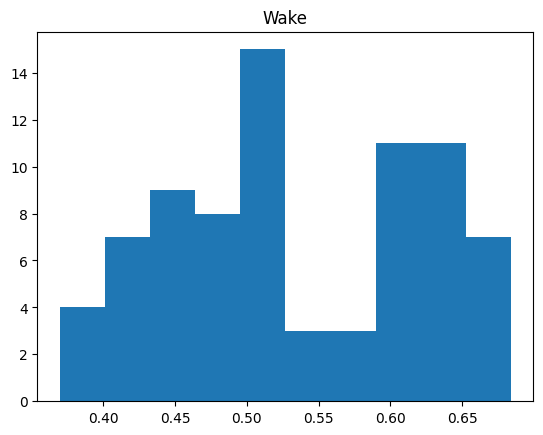

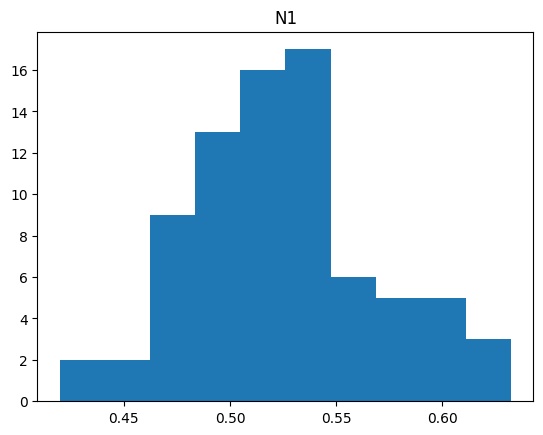

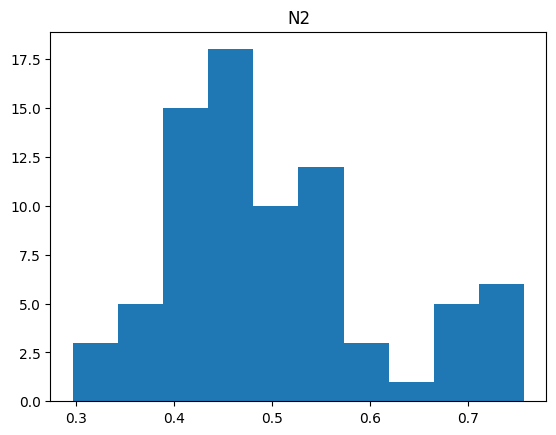

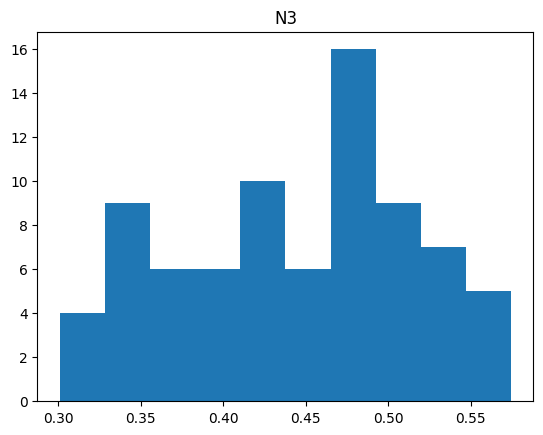

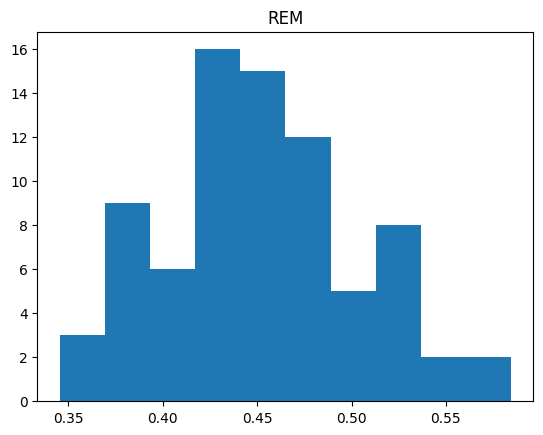

In [10]:
for data_type in data_types:
    results_df = expt_2_combined_results[data_type]
    res_df = run_expts.generate_subset_acc_std(results_df, return_df = True)
    plt.figure()
    plt.title(data_type)
    plt.hist(pd.DataFrame(res_df[[col for col in res_df.columns if 'acc' in col]].mean(axis = 0)).T.values[0])

### Expt 2

In [11]:
#Run Expt 2 experiments 

t1 = time.time()

expt_2_results = {}

for data_type in data_types:
    X_y_groups = loaded_data[data_type]
    
    X = X_y_groups['X']
    y = X_y_groups['y'] 
    groups = X_y_groups['groups'] 
    
    #1.Generate expt specific X,y,groups
    X_expt , y_expt , groups_expt, expt_info = run_expts.generate_expt_x_y_groups(X,y,groups, 2 )

    results_df = run_expts.run_mv_tsc(X_expt,y_expt,groups_expt, {'RF' : RandomForestClassifier()} , return_df = True , subset_names_and_cols = regional_features_dict, random_states = [1,2] )
    
    expt_2_results[data_type] = results_df

t2 = time.time()

t2-t1

97.73480224609375

In [12]:
#Show the results
for data_type in data_types:
    print(data_type)
    results_df = expt_2_results[data_type]
    res_df = run_expts.generate_subset_acc_std(results_df, return_df = True)
    #print the results 
    # print(res_df[[col for col in res_df.columns if 'acc' in col]].mean(axis = 0))
    display(pd.DataFrame(res_df[[col for col in res_df.columns if 'acc' in col]].mean(axis = 0)).T)

Wake


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.696429,0.471429,0.644643,0.616071,0.45,0.535714,0.355357,0.448214,0.564286,0.382143,0.45,0.451786,0.475


N1


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.458889,0.561111,0.547778,0.611111,0.566667,0.557778,0.547778,0.513333,0.587778,0.501111,0.436667,0.568889,0.46


N2


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.477778,0.394444,0.554444,0.425556,0.395556,0.597778,0.48,0.735556,0.606667,0.375556,0.476667,0.416667,0.542222


N3


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.563333,0.556667,0.482222,0.541111,0.325556,0.41,0.363333,0.394444,0.49,0.417778,0.364444,0.497778,0.52


REM


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.417778,0.5,0.486667,0.583333,0.502222,0.392222,0.532222,0.443333,0.331111,0.477778,0.392222,0.497778,0.497778


### Expt 3

In [13]:
#Run Expt 3 experiments 

t1 = time.time()

expt_3_results = {}

for data_type in data_types:
    X_y_groups = loaded_data[data_type]
    
    X = X_y_groups['X']
    y = X_y_groups['y'] 
    groups = X_y_groups['groups'] 
    
    #1.Generate expt specific X,y,groups
    X_expt , y_expt , groups_expt, expt_info = run_expts.generate_expt_x_y_groups(X,y,groups, 3)

    results_df = run_expts.run_mv_tsc(X_expt,y_expt,groups_expt, {'RF' : RandomForestClassifier()} , return_df = True , subset_names_and_cols = regional_features_dict, random_states = [1,2] )
    
    expt_3_results[data_type] = results_df

t2 = time.time()

t2-t1

83.8564760684967

In [14]:
#Show the results
for data_type in data_types:
    print(data_type)
    results_df = expt_3_results[data_type]
    res_df = run_expts.generate_subset_acc_std(results_df, return_df = True)
    #print the results 
    # print(res_df[[col for col in res_df.columns if 'acc' in col]].mean(axis = 0))
    display(pd.DataFrame(res_df[[col for col in res_df.columns if 'acc' in col]].mean(axis = 0)).T)

Wake


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.348485,0.302273,0.410606,0.347727,0.251515,0.257576,0.159848,0.197727,0.322727,0.193939,0.197727,0.169697,0.206061


N1


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.337619,0.304286,0.280952,0.330952,0.365714,0.318095,0.322857,0.289524,0.345238,0.387619,0.267619,0.316667,0.29619


N2


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.238571,0.247619,0.366667,0.27381,0.338571,0.34,0.301905,0.389524,0.269524,0.38,0.297143,0.367619,0.325238


N3


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.355238,0.264286,0.284762,0.289048,0.276667,0.234286,0.267619,0.25619,0.250476,0.257619,0.222857,0.297143,0.312857


REM


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.363187,0.312637,0.34011,0.456044,0.377473,0.334615,0.341209,0.310989,0.254945,0.357143,0.334615,0.318132,0.414835


#### Expt 4

In [15]:
t1 = time.time()

expt_4_results = {}

for data_type in data_types:
    X_y_groups = loaded_data[data_type]
    
    X = X_y_groups['X']
    y = X_y_groups['y'] 
    groups = X_y_groups['groups'] 
    
    #1.Generate expt specific X,y,groups
    X_expt , y_expt , groups_expt, expt_info = run_expts.generate_expt_x_y_groups(X,y,groups, 4)

    results_df = run_expts.run_mv_tsc(X_expt,y_expt,groups_expt, {'RF' : RandomForestClassifier()} , return_df = True , subset_names_and_cols = regional_features_dict, random_states = [1,2] )
    
    expt_4_results[data_type] = results_df

t2 = time.time()

t2-t1

62.88426947593689

In [16]:
#Show the results
for data_type in data_types:
    print(data_type)
    results_df = expt_4_results[data_type]
    res_df = run_expts.generate_subset_acc_std(results_df, return_df = True)
    #print the results 
    # print(res_df[[col for col in res_df.columns if 'acc' in col]].mean(axis = 0))
    display(pd.DataFrame(res_df[[col for col in res_df.columns if 'acc' in col]].mean(axis = 0)).T)

Wake


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.275758,0.185606,0.284091,0.213636,0.233333,0.152273,0.133333,0.250758,0.296212,0.149242,0.22197,0.151515,0.15303


N1


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.345238,0.339524,0.254286,0.380476,0.330476,0.337143,0.33,0.297143,0.304762,0.394762,0.297143,0.309524,0.26619


N2


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.204762,0.254286,0.32381,0.338571,0.337143,0.324762,0.274286,0.346667,0.24,0.386667,0.352381,0.325714,0.28381


N3


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.345714,0.254762,0.26381,0.318095,0.29619,0.260476,0.27619,0.299048,0.297619,0.298095,0.18,0.310952,0.332381


REM


,Prefrontal_RF_acc,Frontal_RF_acc,Left Frontal_RF_acc,Right Frontal_RF_acc,Central_RF_acc,Left Central_RF_acc,Right Central_RF_acc,Left Temporal_RF_acc,Right Temporal_RF_acc,Parietal_RF_acc,Left Parietal_RF_acc,Right Parietal_RF_acc,Occipital_RF_acc
0,0.333516,0.340659,0.354396,0.360989,0.297253,0.356044,0.356044,0.38956,0.362637,0.339011,0.406044,0.356044,0.442857
